<a href="https://colab.research.google.com/github/sfarheen28/app_predictive_modeling/blob/main/APL_preprocess_ch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
glass_identification = fetch_ucirepo(id=42)

# data (as pandas dataframes)
X = glass_identification.data.features
y = glass_identification.data.targets

# metadata
print(glass_identification.metadata)

# variable information
print(glass_identification.variables)


{'uci_id': 42, 'name': 'Glass Identification', 'repository_url': 'https://archive.ics.uci.edu/dataset/42/glass+identification', 'data_url': 'https://archive.ics.uci.edu/static/public/42/data.csv', 'abstract': 'From USA Forensic Science Service; 6 types of glass; defined in terms of their oxide content (i.e. Na, Fe, K, etc)', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 214, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Type_of_glass'], 'index_col': ['Id_number'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5WW2P', 'creators': ['B. German'], 'intro_paper': None, 'additional_info': {'summary': 'Vina conducted a comparison test of her rule-based system, BEAGLE, the nearest-neighbor algorithm, and discriminant analysis.  BEAGLE is a product available through VRS Consulting, In

In [46]:
import pandas as pd
import numpy as np

In [3]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


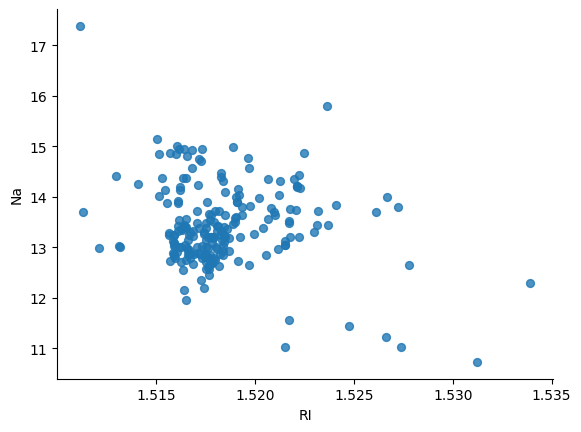

In [10]:
# @title RI vs Na

from matplotlib import pyplot as plt
X.plot(kind='scatter', x='RI', y='Na', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
m

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>]], dtype=object)

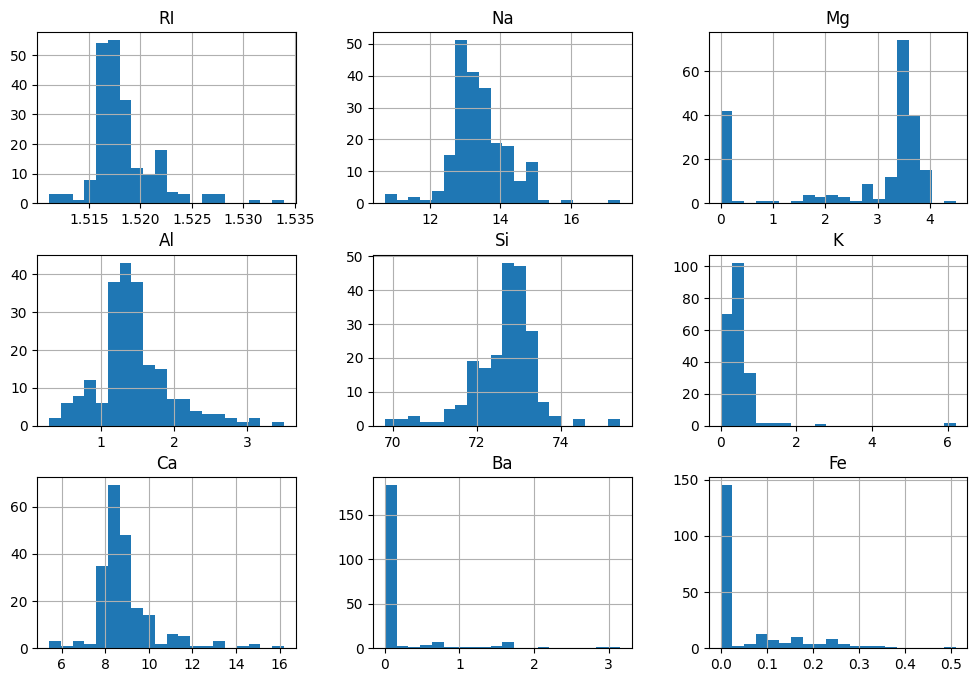

In [8]:
# @title Histogram

from matplotlib import pyplot as plt
X.hist(bins=20, figsize=(12, 8))

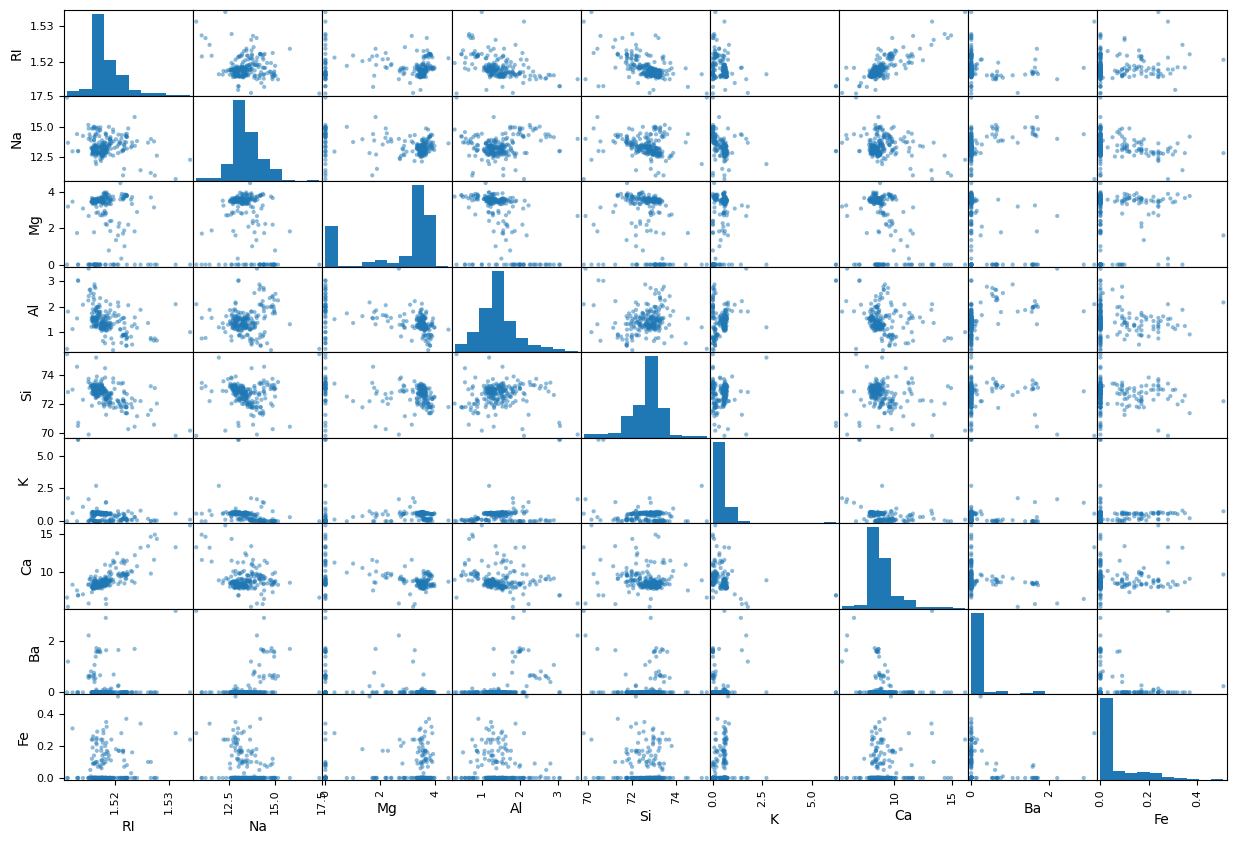

In [16]:
# @title Scatter Matrix

from pandas.plotting import scatter_matrix

scatter_matrix(X, figsize = (15,10))
plt.show()

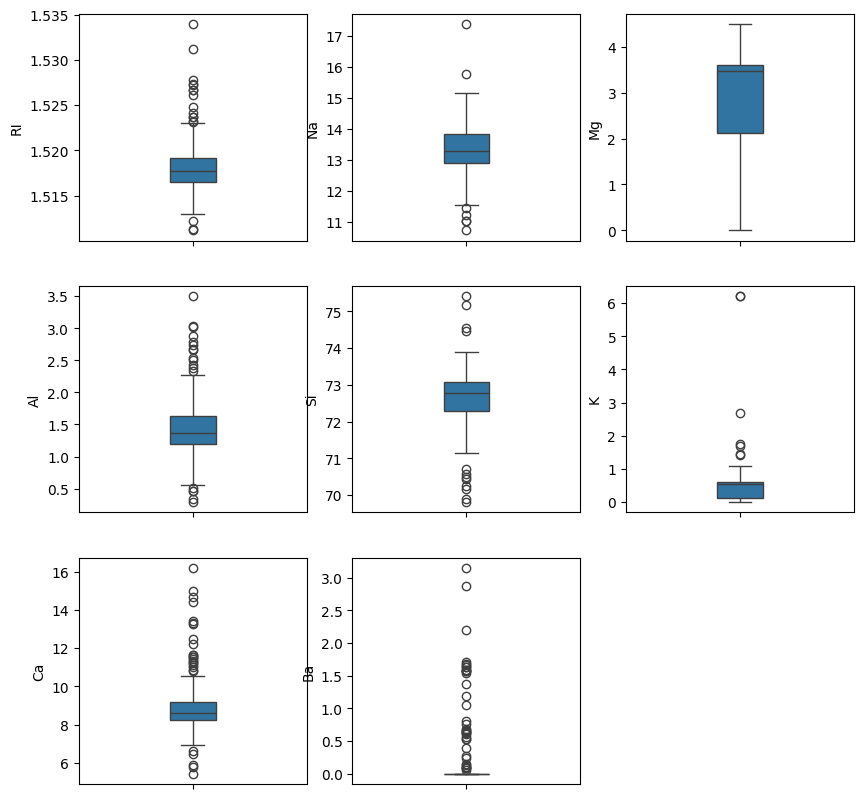

In [39]:
import seaborn as sns

fig, axes = plt.subplots(3, 3, figsize = (10,10))
flattened_axes = fig.axes
flattened_axes[-1].set_visible(False)

for i, var in enumerate(X):
    ax = flattened_axes[i]
    sns.boxplot(y=var, width=0.2, data=X, ax=ax, showfliers=True)

In [50]:
pd.options.display.float_format = "{:,.2f}".format
pd.DataFrame({'max': X.max(), 'ratio': X.max()/(X.min()+0.000001), 'min': X.min(),
              'sqrt max': np.sqrt(X.max()), 'sqrt min': np.sqrt(X.min())})

,max,ratio,min,sqrt max,sqrt min
RI,1.53,1.02,1.51,1.24,1.23
Na,17.38,1.62,10.73,4.17,3.28
Mg,4.49,"4,490,000.00",0.00,2.12,0.00
Al,3.50,12.07,0.29,1.87,0.54
Si,75.41,1.08,69.81,8.68,8.36
K,6.21,"6,210,000.00",0.00,2.49,0.00
Ca,16.19,2.98,5.43,4.02,2.33
Ba,3.15,"3,150,000.00",0.00,1.77,0.00
Fe,0.51,"510,000.00",0.00,0.71,0.00


In [43]:
X.skew()

,0
RI,1.63
Na,0.45
Mg,-1.15
Al,0.91
Si,-0.73
K,6.55
Ca,2.05
Ba,3.42
Fe,1.75


In [55]:
X_scaled = X.copy()
for column in X_scaled.columns:
    X_scaled[column] = (X_scaled[column] - X_scaled[column].mean()) / X_scaled[column].std()

In [58]:
X.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.00,214.00,214.00,214.00,214.00,214.00,214.00,214.00,214.00
mean,1.52,13.41,2.68,1.44,72.65,0.50,8.96,0.18,0.06
std,0.00,0.82,1.44,0.50,0.77,0.65,1.42,0.50,0.10
min,1.51,10.73,0.00,0.29,69.81,0.00,5.43,0.00,0.00
25%,1.52,12.91,2.11,1.19,72.28,0.12,8.24,0.00,0.00
50%,1.52,13.30,3.48,1.36,72.79,0.56,8.60,0.00,0.00
75%,1.52,13.82,3.60,1.63,73.09,0.61,9.17,0.00,0.10
max,1.53,17.38,4.49,3.50,75.41,6.21,16.19,3.15,0.51


In [57]:
X_scaled.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.00,214.00,214.00,214.00,214.00,214.00,214.00,214.00,214.00
mean,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.38,-3.28,-1.86,-2.31,-3.67,-0.76,-2.48,-0.35,-0.59
25%,-0.61,-0.61,-0.39,-0.51,-0.48,-0.57,-0.50,-0.35,-0.59
50%,-0.23,-0.13,0.55,-0.17,0.18,0.09,-0.25,-0.35,-0.59
75%,0.26,0.51,0.63,0.37,0.56,0.17,0.15,-0.35,0.44
max,5.13,4.86,1.25,4.12,3.56,8.76,5.08,5.98,4.65


In [59]:
X_scaled.skew()

,0
RI,1.63
Na,0.45
Mg,-1.15
Al,0.91
Si,-0.73
K,6.55
Ca,2.05
Ba,3.42
Fe,1.75
